# **Análisis contaminantes registrados**

*Nota: hacer el trabajo con el nuevo conjunto de datos llamado "CSV_Datos_Ok.csv"*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
datosContaminantes = pd.read_csv("CSV_Datos_OK.csv", parse_dates={"Fecha":["Año", "Mes", "Día"]})
datosContaminantes = datosContaminantes.drop(["Minuto", "Segundo"], axis=1)
datosContaminantes

,Fecha,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-11-27,12,43.0000,1,1,12,pm25
1,2012-11-27,13,22.0000,1,1,12,pm25
2,2012-11-27,14,31.0000,1,1,12,pm25
3,2012-11-27,15,29.0000,1,1,12,pm25
4,2012-11-27,16,32.0000,1,1,12,pm25
...,...,...,...,...,...,...,...
1185035,2022-07-31,19,10.6495,1,1,86,pm25
1185036,2022-07-31,20,9.4167,1,1,86,pm25
1185037,2022-07-31,21,15.2623,1,1,86,pm25
1185038,2022-07-31,22,16.4119,1,1,86,pm25


In [3]:
# Funcion para convertir valores str en float
def ToFloat(df):
    if isinstance(df, str):
        if df.count('.') == 2:
            return float( df.replace('.', '', 1) )
        else:
            return float(df)
    else:
        return float(df)

# Funcion para extraer los dias de la semana
def DayOfWeek(df):
    return df.strftime('%A')

In [4]:
# Reemplazando valores en la columna a aplicar la funcion ToFloat
datosContaminantes["valor_contaminante"] = datosContaminantes["valor_contaminante"].apply(ToFloat)

# insertando los dias
datosContaminantes.insert(1, "Dia_Semana", np.array( datosContaminantes["Fecha"].apply(DayOfWeek) ) )

datosContaminantes

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-11-27,Tuesday,12,43.0000,1,1,12,pm25
1,2012-11-27,Tuesday,13,22.0000,1,1,12,pm25
2,2012-11-27,Tuesday,14,31.0000,1,1,12,pm25
3,2012-11-27,Tuesday,15,29.0000,1,1,12,pm25
4,2012-11-27,Tuesday,16,32.0000,1,1,12,pm25
...,...,...,...,...,...,...,...,...
1185035,2022-07-31,Sunday,19,10.6495,1,1,86,pm25
1185036,2022-07-31,Sunday,20,9.4167,1,1,86,pm25
1185037,2022-07-31,Sunday,21,15.2623,1,1,86,pm25
1185038,2022-07-31,Sunday,22,16.4119,1,1,86,pm25


Arreglamos los datos que presenten inconsistencias, ordenamos de menor a mayor por fechas y borramos columna de índice duplicada tras la última operación:

In [5]:
datosContaminantes = datosContaminantes[(datosContaminantes["valor_contaminante"] >= 0.0) & \
                                        (datosContaminantes["valor_contaminante"] != 999.0) & \
                                        (datosContaminantes["calidad_contaminante"] != 151)]
datosContaminantes

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-11-27,Tuesday,12,43.0000,1,1,12,pm25
1,2012-11-27,Tuesday,13,22.0000,1,1,12,pm25
2,2012-11-27,Tuesday,14,31.0000,1,1,12,pm25
3,2012-11-27,Tuesday,15,29.0000,1,1,12,pm25
4,2012-11-27,Tuesday,16,32.0000,1,1,12,pm25
...,...,...,...,...,...,...,...,...
1185035,2022-07-31,Sunday,19,10.6495,1,1,86,pm25
1185036,2022-07-31,Sunday,20,9.4167,1,1,86,pm25
1185037,2022-07-31,Sunday,21,15.2623,1,1,86,pm25
1185038,2022-07-31,Sunday,22,16.4119,1,1,86,pm25


In [6]:
datosContaminantes = datosContaminantes.sort_values(by=["Fecha", "Hora"]).reset_index().drop("index", axis=1)
datosContaminantes

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-09-18,Tuesday,12,16.0000,1,1,25,pm25
1,2012-09-18,Tuesday,13,18.0000,1,1,25,pm25
2,2012-09-18,Tuesday,14,18.0000,1,1,25,pm25
3,2012-09-18,Tuesday,15,17.0000,1,1,25,pm25
4,2012-09-18,Tuesday,16,17.0000,1,1,25,pm25
...,...,...,...,...,...,...,...,...
1185035,2022-08-31,Wednesday,19,113.3006,1,1,6,nox
1185036,2022-08-31,Wednesday,20,46.5652,1,1,6,nox
1185037,2022-08-31,Wednesday,21,51.3882,1,1,6,nox
1185038,2022-08-31,Wednesday,22,88.6126,1,1,6,nox


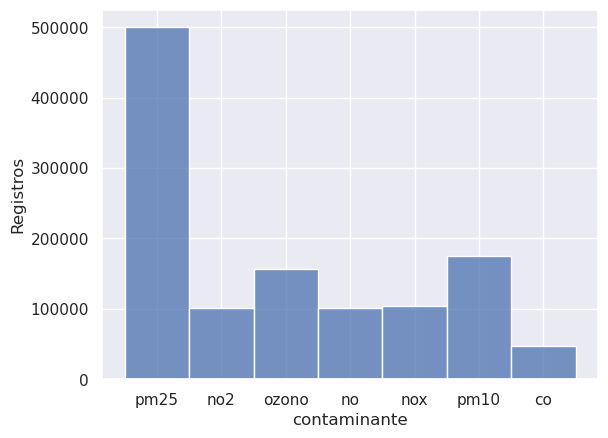

In [7]:
sns.set_theme(style='dark')
sns.color_palette("dark:salmon_r", as_cmap=True)

sns.histplot(data=datosContaminantes, x="contaminante")

plt.ylabel('Registros')
sns.set(rc={'figure.figsize':(10, 8)}); plt.grid(); plt.show()

## **Muestra aleatoria de tamaño definido**

Se ha elegido un tamaño de muestra representativo de $n=1600$ datos

In [8]:
muestraContaminantes = datosContaminantes.sample(n=1600)  # muestra aleatoria de tamaño 1600
muestraContaminantes

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
148445,2015-12-29,Tuesday,5,22.0000,1,1,6,no
835742,2020-02-22,Saturday,16,28.7138,1,1,86,pm25
699460,2019-06-01,Saturday,21,13.2374,1,1,80,pm25
551315,2018-08-22,Wednesday,19,23.0000,1,1,48,pm25
668201,2019-04-02,Tuesday,16,5.0000,1,1,44,pm25
...,...,...,...,...,...,...,...,...
216661,2016-07-23,Saturday,16,18.3772,1,1,25,no2
292046,2017-02-25,Saturday,4,28.0000,1,1,12,pm25
778762,2019-11-05,Tuesday,11,16.1000,1,1,25,ozono
238778,2016-09-27,Tuesday,13,43.0000,1,1,6,pm10


In [9]:
# ordenar los valores de la muestra
muestraContaminantes = muestraContaminantes.sort_values(by=["Fecha", "Hora"]).reset_index().drop("index", axis=1)
muestraContaminantes

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-11-11,Sunday,14,22.0000,1,1,25,pm25
1,2012-11-27,Tuesday,16,32.0000,1,1,12,pm25
2,2012-12-12,Wednesday,18,47.0000,1,1,25,pm25
3,2012-12-28,Friday,12,23.0000,1,1,25,pm25
4,2013-01-09,Wednesday,22,37.0000,1,1,12,pm25
...,...,...,...,...,...,...,...,...
1595,2022-07-18,Monday,21,9.6613,1,1,83,pm25
1596,2022-07-20,Wednesday,10,14.5409,1,1,84,pm25
1597,2022-07-26,Tuesday,4,45.0003,1,1,6,nox
1598,2022-07-26,Tuesday,8,19.0000,1,1,48,pm25


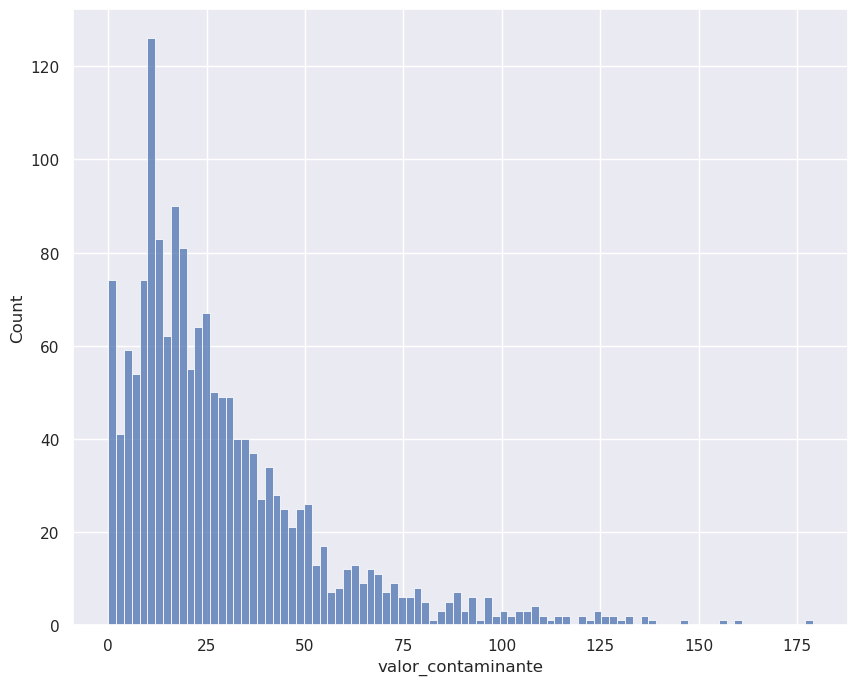

In [10]:
sns.set_theme(style='dark')

sns.histplot(muestraContaminantes, x='valor_contaminante', bins=90)
sns.set(rc={'figure.figsize':(10, 8)}); plt.grid(); plt.show()

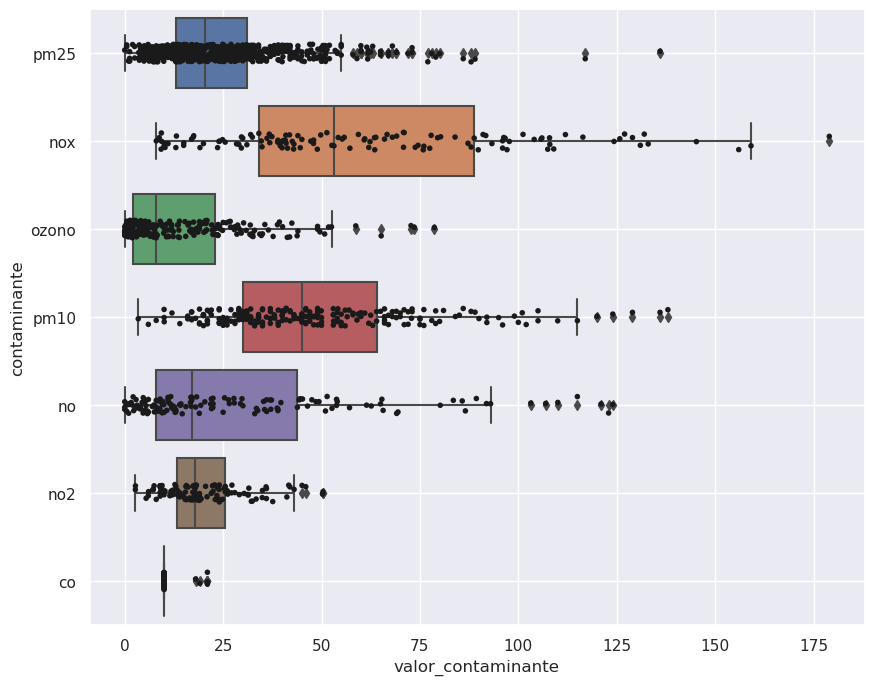

In [11]:
sns.set_theme(style='dark')

sns.boxplot(data=muestraContaminantes, x='valor_contaminante', y='contaminante')

sns.stripplot(data=muestraContaminantes, x='valor_contaminante', y='contaminante',
              size=4, color='k', linewidth=0)

sns.set(rc={'figure.figsize':(10, 8)}); plt.grid(); plt.show()

## **Contaminante pm2.5 para la muestra aleatoria**

Veamos la distribución del contaminante pm2.5 para la muestra aleatoria extraída de tamaño $n=1000$ representando los datos mediante un diagrama de cajas y bigotes

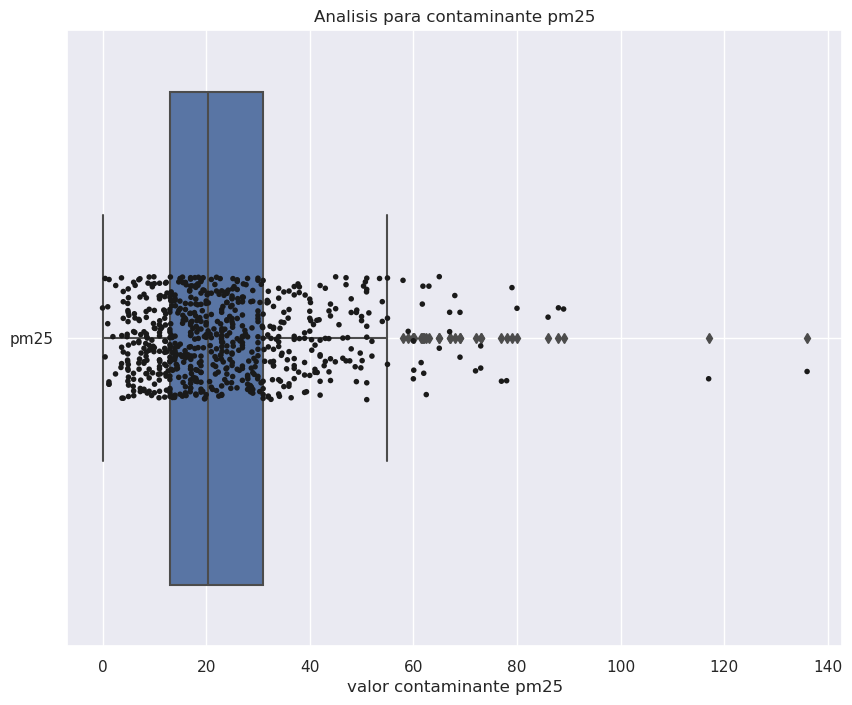

In [12]:
sns.set_theme(style='dark')

sns.boxplot(data=muestraContaminantes[ muestraContaminantes['contaminante'] == 'pm25' ], x='valor_contaminante', y='contaminante')

sns.stripplot(data=muestraContaminantes[ muestraContaminantes['contaminante'] == 'pm25' ], x='valor_contaminante', y='contaminante',
              size=4, color='k', linewidth=0)

sns.set(rc={'figure.figsize':(12, 5)})

plt.title("Analisis para contaminante pm25"); plt.ylabel(''); plt.xlabel('valor contaminante pm25'); plt.grid(); plt.show()

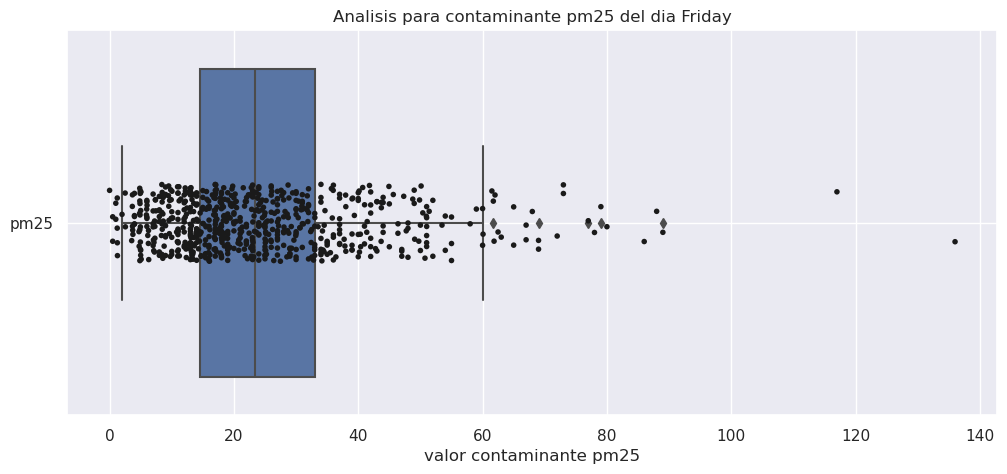

In [13]:
dia = 'Friday'

sns.set_theme(style='dark')

sns.boxplot(data=muestraContaminantes[ (muestraContaminantes['contaminante'] == 'pm25') & \
                                       (muestraContaminantes['Dia_Semana'] == dia) ],
            x='valor_contaminante', y='contaminante')

sns.stripplot(data=muestraContaminantes[ muestraContaminantes['contaminante'] == 'pm25' ],
              x='valor_contaminante',
              y='contaminante',
              size=4, color='k', linewidth=0)

sns.set(rc={'figure.figsize':(12, 6)})

plt.title(f"Analisis para contaminante pm25 del dia {dia}")
plt.ylabel(''); plt.xlabel('valor contaminante pm25'); plt.grid(); plt.show()

# **Comportamiento en el tiempo de los contaminantes**

* ### **PM25**

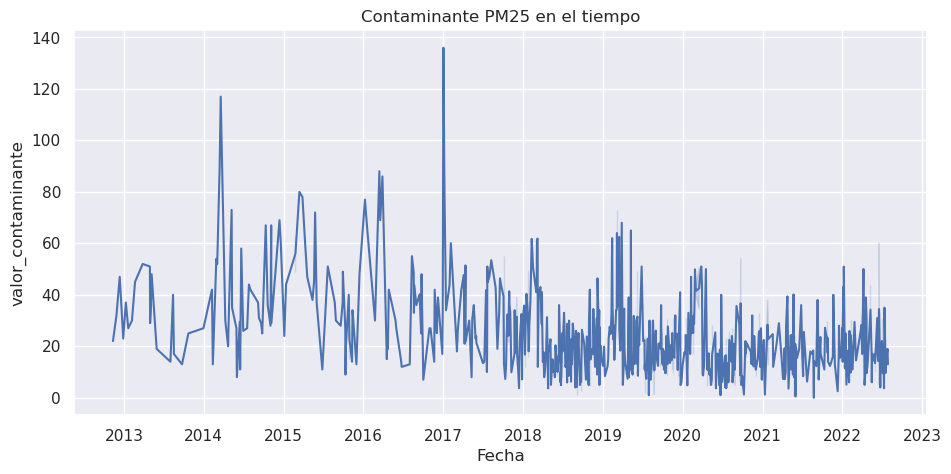

In [22]:
sns.lineplot(
    data = muestraContaminantes[muestraContaminantes["contaminante"] == "pm25"],
    x = "Fecha",
    y = "valor_contaminante"
    )

plt.title("Contaminante PM25 en el tiempo"); plt.show()

## **Tendencia**

Para visualizar con mejor detalle lo que sucede en términos de la tendencia del contaminante, veamos con una linea de tendencia los datos en su forma de dispersión

In [50]:
def toTimestamp(df):
    return datetime.timestamp(df)

Para calcular la linea de tendencia, es necesario que los datos en el eje x sean de tipo `timestamp`, de esta forma los calculos serán permitidos y podremos determinar el orden de ajuste.

In [55]:
# para calcular la linea de tendencia se requieren datos tipo
# 'timestamp' el eje x
muestraFechaTimestamp = muestraContaminantes.copy()
muestraFechaTimestamp["Fecha"] = muestraFechaTimestamp["Fecha"].apply(toTimestamp)

muestraFechaTimestamp

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,1.352610e+09,Sunday,14,22.0000,1,1,25,pm25
1,1.353992e+09,Tuesday,16,32.0000,1,1,12,pm25
2,1.355288e+09,Wednesday,18,47.0000,1,1,25,pm25
3,1.356671e+09,Friday,12,23.0000,1,1,25,pm25
4,1.357708e+09,Wednesday,22,37.0000,1,1,12,pm25
...,...,...,...,...,...,...,...,...
1595,1.658120e+09,Monday,21,9.6613,1,1,83,pm25
1596,1.658293e+09,Wednesday,10,14.5409,1,1,84,pm25
1597,1.658812e+09,Tuesday,4,45.0003,1,1,6,nox
1598,1.658812e+09,Tuesday,8,19.0000,1,1,48,pm25


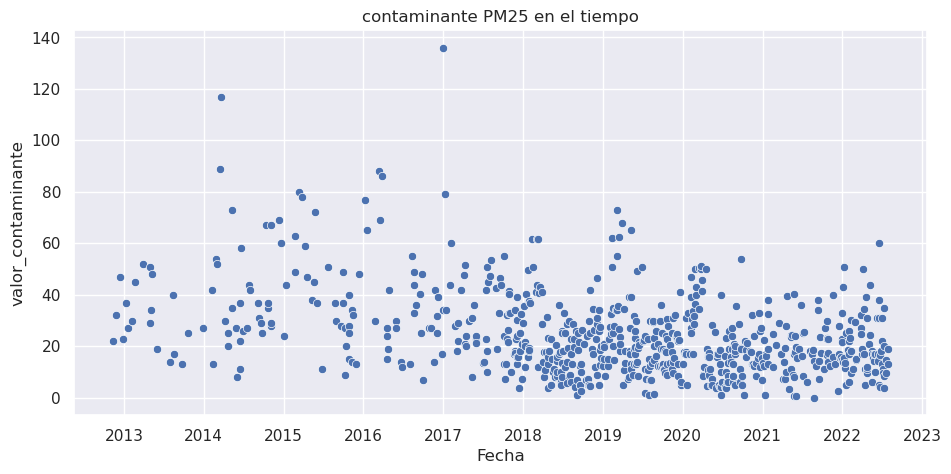

In [52]:
sns.set(rc={'figure.figsize':(11, 5)})

sns.scatterplot(
    data=muestraContaminantes[muestraContaminantes["contaminante"] == "pm25"],
    x="Fecha",
    y="valor_contaminante")

plt.title("contaminante PM25 en el tiempo"); plt.show()

Veamos, para los distintos contaminantes, una linea de tendencia que se ajuste a los datos, para un orden y un contaminante determinado con la siguiente función que permite graficar estos datos:

In [94]:
def scatterFit(contaminante, ordenAjuste=1):

    sns.set(rc={'figure.figsize':(11, 5)})

    # dispersion y linea de tendencia para los datos con timestamp
    sns.regplot(
        data=muestraFechaTimestamp[muestraFechaTimestamp["contaminante"] == contaminante],
        x="Fecha",
        y="valor_contaminante",
        line_kws={"color": "orange"},
        order=ordenAjuste  # orden del ajuste
    )

    # configurar las fechas como datetime para el eje x
    ax = plt.gca()
    xticks = ax.get_xticks()
    xticks_dates = [datetime.fromtimestamp(x).strftime('%Y-%m') for x in xticks]
    ax.set_xticklabels(xticks_dates)

    plt.title(f"contaminante {contaminante} en el tiempo"); plt.show()

    pass

Veamos los ajustes para cada uno de los contaminantes:

/tmp/ipykernel_31746/1826620527.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_dates)


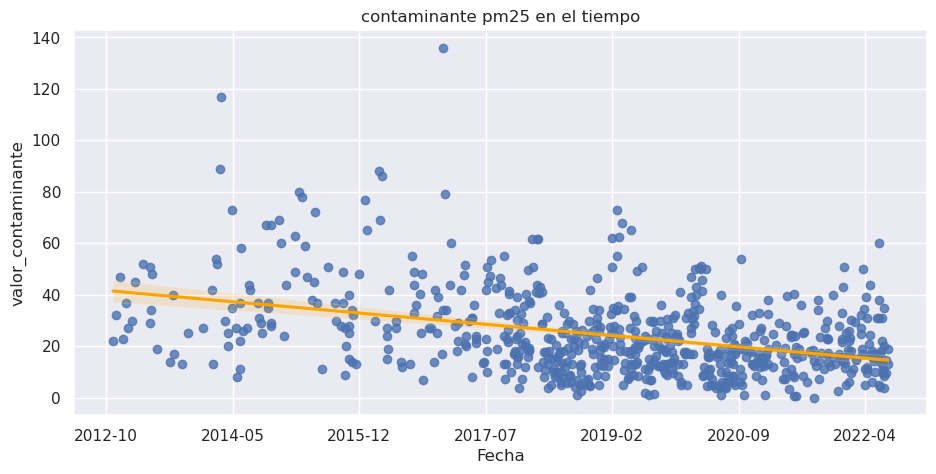

None

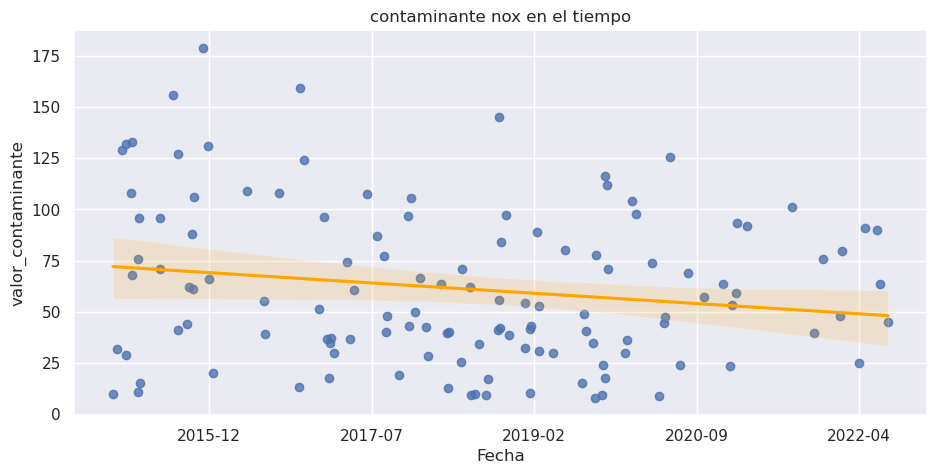

None

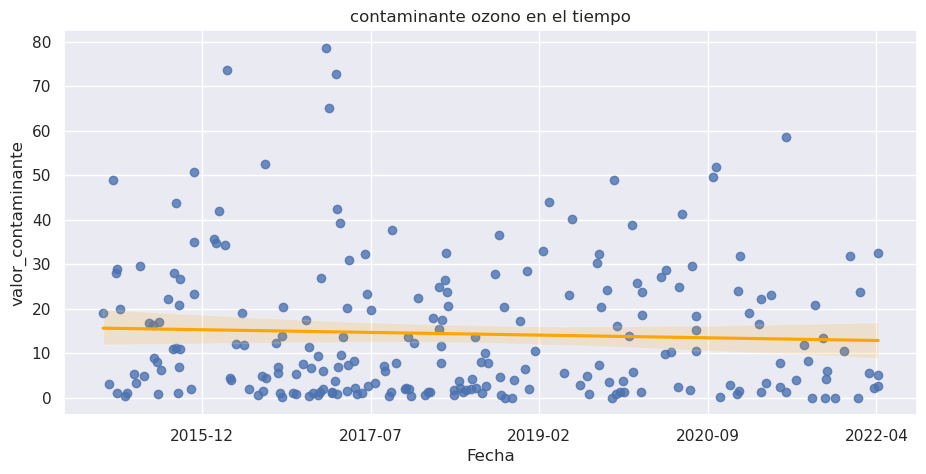

None

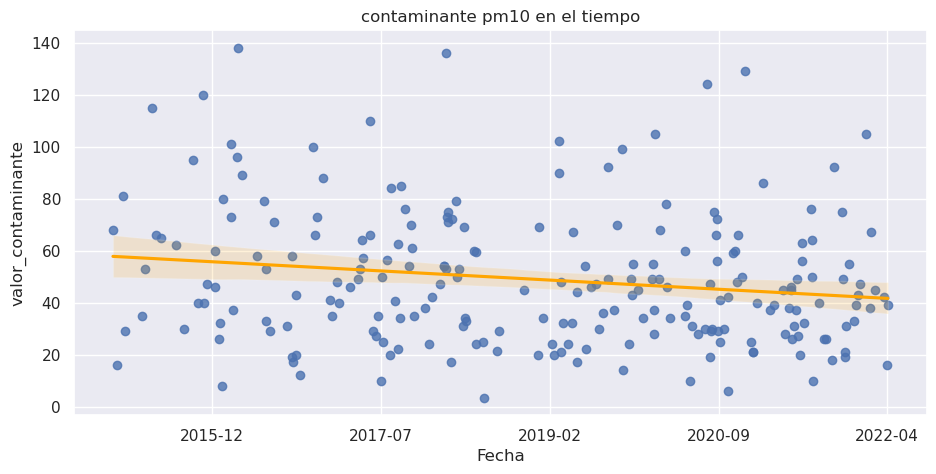

None

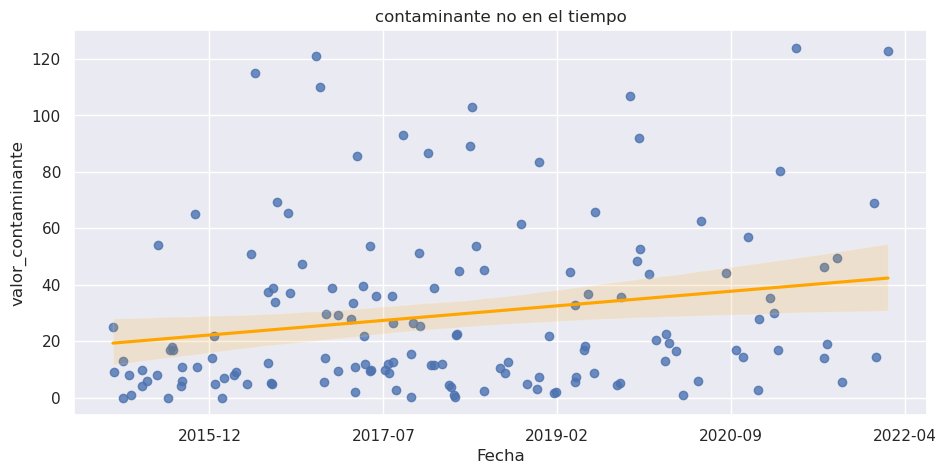

None

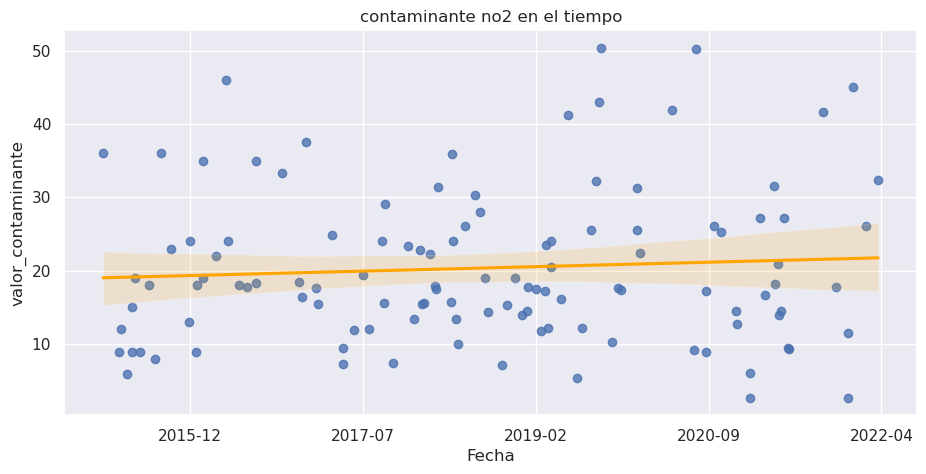

None

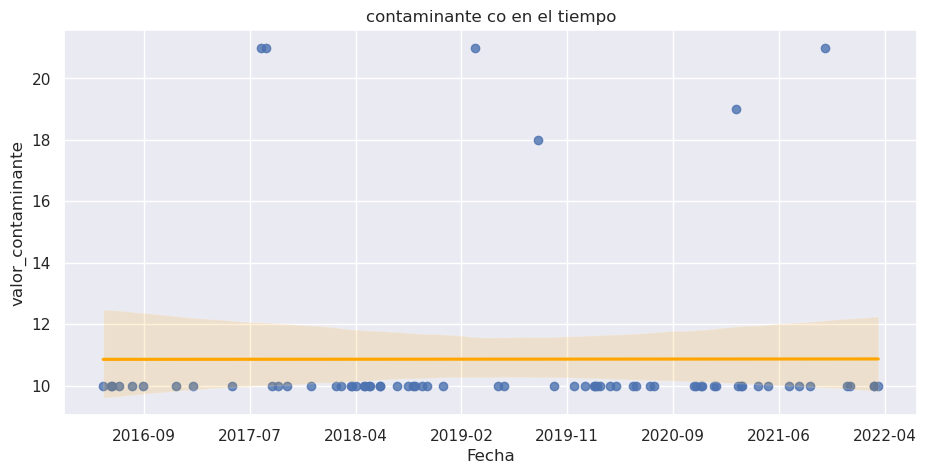

None

In [95]:
contaminantes = muestraContaminantes["contaminante"].unique()

for cont in contaminantes:
    display(scatterFit(cont, ordenAjuste=1))